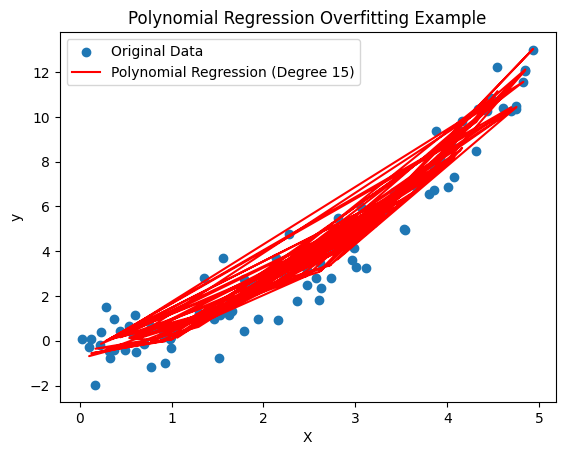

Training Error Percentage: 0.75%


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


np.random.seed(42)


X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = 0.5 * X**2 + np.random.randn(100, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=20, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)


lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

y_train_pred = lin_reg.predict(X_train_poly)

plt.scatter(X, y, label='Original Data')
plt.plot(X_train, y_train_pred, 'r-', label='Polynomial Regression (Degree 15)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression Overfitting Example')
plt.show()


train_error = mean_squared_error(y_train, y_train_pred)


print(f'Training Error Percentage: {train_error:.2f}%')


Study:
* When the Data which contain Non-Linear Relationship has been subjected to an Polynomail Regression() Algorithm and when  the degree is 
  increased gradually the model overfits and makes the model to predict in a low accuracy.
* The Training Error Percentage: 0.75% 


Implementation of Polynomail Regression by intergrating Clustering (DBSCAN)

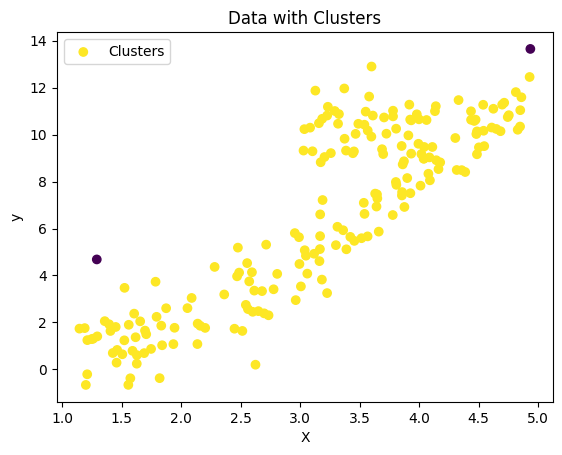

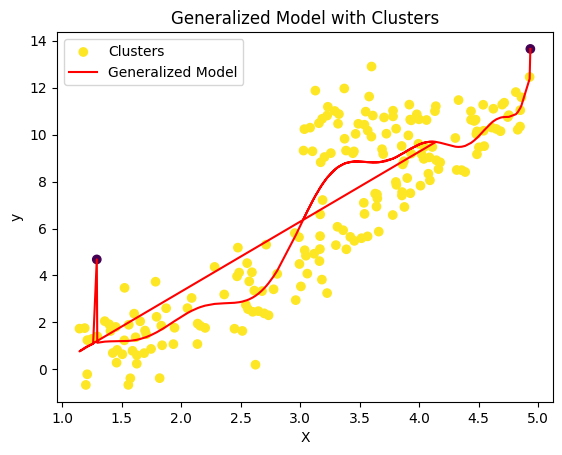

Generalized Model Error Percentage: 2.63%


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_squared_error

np.random.seed(42)

X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = 0.5 * X**2 + np.random.randn(200, 1)

X[:50] += 3
y[:50] += 10

data = np.hstack((X, y))

dbscan = DBSCAN(eps=1, min_samples=5)
clusters = dbscan.fit_predict(data)
plt.scatter(X, y, c=clusters, cmap='viridis', label='Clusters')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data with Clusters')
plt.legend()
plt.show()

X_train, X_test, y_train, y_test, clusters_train, _ = train_test_split(X, y, clusters, test_size=0.2, random_state=42)

models = {}


for cluster_label in np.unique(clusters_train):
   
    cluster_mask = (clusters_train == cluster_label)
    X_cluster = X_train[cluster_mask]
    y_cluster = y_train[cluster_mask]

   
    poly_features = PolynomialFeatures(degree=20, include_bias=False)
    X_cluster_poly = poly_features.fit_transform(X_cluster)

   
    lin_reg = LinearRegression()
    lin_reg.fit(X_cluster_poly, y_cluster)

    
    models[cluster_label] = (lin_reg, poly_features)


y_pred = np.zeros_like(y)
for cluster_label, (lin_reg, poly_features) in models.items():
    cluster_mask = (clusters == cluster_label)
    X_cluster_poly = poly_features.transform(data[cluster_mask, :1])
    y_pred[cluster_mask] = lin_reg.predict(X_cluster_poly)


plt.scatter(X, y, c=clusters, cmap='viridis', label='Clusters')
plt.plot(X, y_pred, 'r-', label='Generalized Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Generalized Model with Clusters')
plt.show()


generalized_error = mean_squared_error(y, y_pred)

print(f'Generalized Model Error Percentage: {generalized_error:.2f}%')


Study:
* Now initially the data with Non-Linear Relationship has been subjected to a DBSCAN clustering algorithm() as a frist step and then when it    
  intergrated with Polynomial Regression() Algorithm It is initially clusters the data into different groups and then the regression algorithm 
  is given the clusters as input and the degree of the equation is unchanged

* While this method is followed apprently the model learns better as the input is given with similar features and also the accuracy of the model
  is also increses gradually
  
* Generalized Model Error Percentage: 2.63%


Implementation of Polynomail Regression by intergrating Clustering (KMeans)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


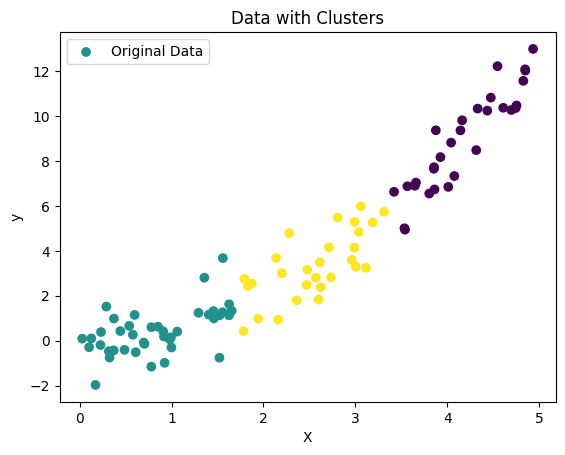

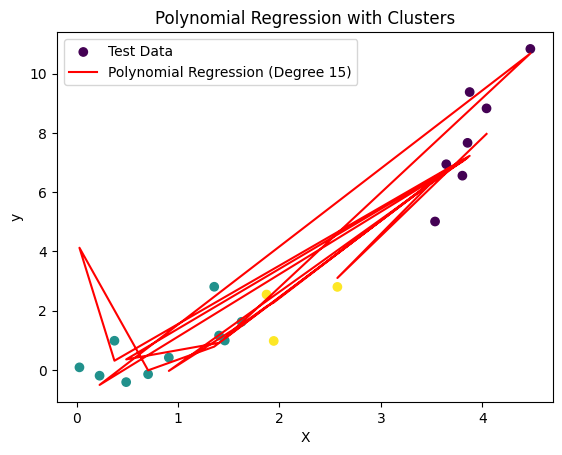

Test Error Percentage: 6.50%


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

np.random.seed(42)


X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = 0.5 * X**2 + np.random.randn(100, 1)


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)


X_train, X_test, y_train, y_test, clusters_train, clusters_test = train_test_split(
    X, y, clusters, test_size=0.2, random_state=42
)


poly_features = PolynomialFeatures(degree=15, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)


y_train_pred = lin_reg.predict(X_train_poly)


y_test_pred = lin_reg.predict(X_test_poly)


plt.scatter(X, y, c=clusters, cmap='viridis', label='Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data with Clusters')
plt.legend()
plt.show()


plt.scatter(X_test, y_test, c=clusters_test, cmap='viridis', label='Test Data')
plt.plot(X_test, y_test_pred, 'r-', label='Polynomial Regression (Degree 15)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression with Clusters')
plt.legend()
plt.show()


test_error = mean_squared_error(y_test, y_test_pred)
test_error_percentage = (test_error / np.mean(y_test**2)) * 100

print(f'Test Error Percentage: {test_error_percentage:.2f}%')


Study:
* Now initially the data with Non-Linear Relationship has been subjected to a KMeans clustering algorithm()  as a frist step and then when it   
  intergrated with Polynomial Regression() Algorithm It is initially clusters the data into different groups and then the regression algorithm 
  is given the clusters as input and the degree of the equation is unchanged

* While this method is followed apprently the model learns better as the input is given with similar features and also the accuracy of the model
  is also increses gradually
  
* Generalized Model Error Percentage: 6.50 %
